# Assignment 3

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

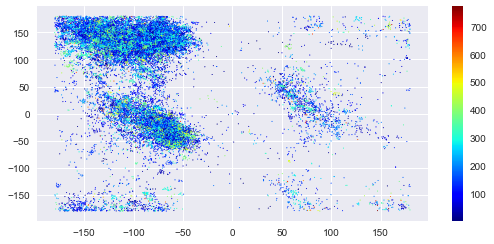

In [28]:
d = pd.read_csv('./data_assignment3.csv')

xValues = d['phi']
yValues = d['psi']

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.scatter(xValues,yValues,s=0.5, c=d['position'], cmap="jet")

plt.colorbar()

plt.show()

# KMeans

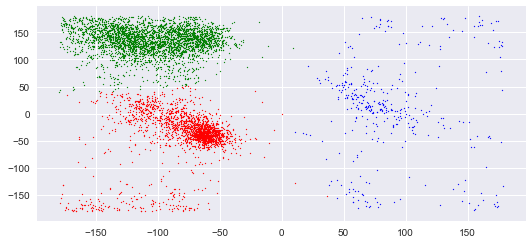

In [29]:
xy_vals = list(zip(xValues, yValues))
X = np.array(xy_vals)

kmeans = KMeans(n_clusters=3).fit_predict(X)
zipped = zip(xy_vals, kmeans)
colors = 'rgbmyck'

for xy, index in list(zipped)[0::5]:
    plt.scatter(xy[0], xy[1], s=1, c=colors[index])

plt.show()

**3) DBSCAN**

In [53]:
# computing the DBSCAN
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.1, min_samples=20,).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
labels = db.labels_ 

In [54]:
# counting the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1) 

print('Estimated number of clusters: %d' % n_clusters_) 
print('Estimated number of noise points: %d' % n_noise_) 


Estimated number of clusters: 11
Estimated number of noise points: 1387


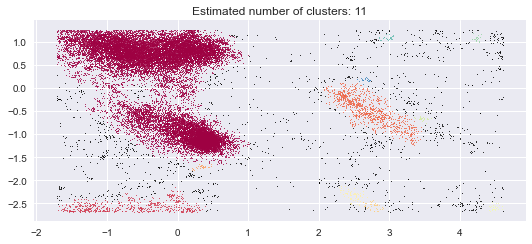

In [55]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=1) 

    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=1) 

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

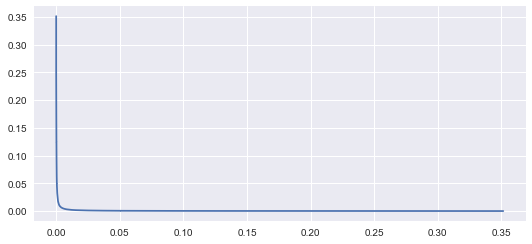

In [51]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances[::-1],distances[::])